It is important for financial institutions to detect the fradualent transactions to protect interests of its customers. The dataset used here has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here it can be observed that majority of features are named as v1,v2 etc. This is a result of PCA transformation that was used to protect the sensitivity of information in the data set.

In [5]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

It can be observed in class column, class 0 represents non fradualent and class of 1 represents fradualant transaction. 

Here mean is very close to 0 so it can be asuumed that there are very few fradualant cases.

In [6]:
df.shape

(284807, 31)

In [7]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]
print(fraud.shape)
print(non_fraud.shape)

(492, 31)
(284315, 31)


Text(0.5, 1.0, 'Transaction class distribution')

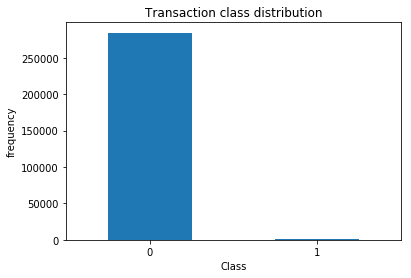

In [8]:
cnt_class=pd.value_counts(df['Class'],sort=True)
cnt_class.plot(kind='bar',rot=0)
plt.xlabel('Class')
plt.ylabel('frequency')
plt.title('Transaction class distribution')


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

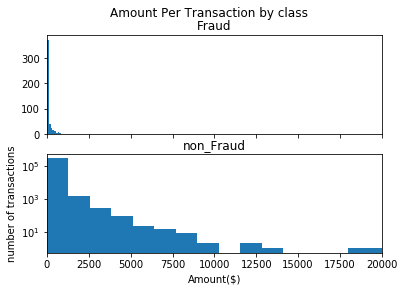

In [11]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle('Amount Per Transaction by class')
ax1.hist(fraud.Amount, bins=20)
ax1.set_title('Fraud')
ax2.hist(non_fraud.Amount, bins=20)
ax2.set_title('non_Fraud')
plt.xlabel('Amount($)')
plt.ylabel('number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

observations:

1) We can see transactions of large amounts in case of non_fradualant transactions whereas in case of 
    fradualant transactions the amount involved is very small.

2) The variation of transaction amounts in case of non-fradualant transactions is very high compared to fradualant. 
 

Now we have to check whether fraudulant transactions occur in a particular time frame.

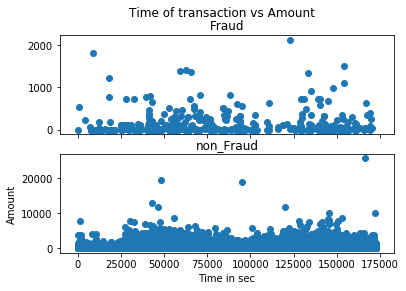

In [12]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle('Time of transaction vs Amount')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(non_fraud.Time, non_fraud.Amount)
ax2.set_title('non_Fraud')
plt.xlabel('Time in sec')
plt.ylabel('Amount')

plt.show()

Since there are both kinds of transaction in same time frame anlysing this further is not useful.

In [45]:
df1=df.sample(frac=0.3)

In [46]:
df1.shape

(85442, 31)

Applying ML models

In [47]:
columns=df1.columns
columns=[c for c in columns if c not in ['Class'] ]
target='Class'
X=df1[columns]
y=df1[target]
print(X.shape)
print(y.shape)

(85442, 30)
(85442,)


In [48]:
fraud1=df1[df1['Class']==1]
non_fraud1=df1[df1['Class']==0]
fraud_frac=len(fraud1)/float(len(non_fraud1))
print('fraud1: ',len(fraud1))
print('non_fraud1: ',len(non_fraud1))
print('fraud_frac: ',(fraud_frac))

fraud1:  155
non_fraud1:  85287
fraud_frac:  0.0018173930376258985


In [49]:
corr_mat=df1.corr()

In [50]:
corr_mat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.125382,-0.011510,-0.419542,-0.098588,0.176368,-0.062846,0.085430,-0.039477,-0.005442,...,0.046368,0.143520,0.048316,-0.016335,-0.233975,-0.042511,-0.008123,-0.010736,-0.011887,-0.014092
V1,0.125382,1.000000,0.034040,-0.003265,-0.014573,0.002594,-0.004863,-0.014207,0.005634,0.002135,...,0.001835,0.002781,0.041492,-0.006538,0.011399,-0.001975,-0.010289,0.021977,-0.246210,-0.098103
V2,-0.011510,0.034040,1.000000,0.022502,-0.013119,0.009238,-0.002957,-0.007118,0.008184,-0.008679,...,0.001643,0.011546,0.041392,-0.005202,0.004920,0.003340,-0.014810,0.023766,-0.546416,0.086990
V3,-0.419542,-0.003265,0.022502,1.000000,-0.004119,-0.005012,0.003660,-0.004236,-0.002036,-0.005580,...,-0.004273,0.009411,0.023714,-0.001651,0.005945,0.001170,0.002728,0.003205,-0.214793,-0.192634
V4,-0.098588,-0.014573,-0.013119,-0.004119,1.000000,-0.002418,-0.006030,0.001304,0.007827,-0.000948,...,0.007254,-0.007293,-0.019902,0.007102,-0.006282,-0.000824,0.006556,-0.003239,0.106990,0.133839
V5,0.176368,0.002594,0.009238,-0.005012,-0.002418,1.000000,0.004839,0.008196,-0.000333,-0.001583,...,-0.003887,0.002454,0.018250,-0.002029,0.004143,0.002004,0.013866,-0.023386,-0.375261,-0.092283
V6,-0.062846,-0.004863,-0.002957,0.003660,-0.006030,0.004839,1.000000,-0.008894,-0.005233,-0.001898,...,0.000229,0.004338,-0.004025,0.001925,0.004882,0.000185,-0.014180,0.016301,0.207369,-0.048831
V7,0.085430,-0.014207,-0.007118,-0.004236,0.001304,0.008196,-0.008894,1.000000,-0.007100,0.001725,...,0.008947,-0.008057,-0.019244,0.003149,-0.011813,-0.000181,-0.022121,0.020895,0.391110,-0.182405
V8,-0.039477,0.005634,0.008184,-0.002036,0.007827,-0.000333,-0.005233,-0.007100,1.000000,-0.007462,...,0.024891,-0.002691,0.017832,0.000442,0.006003,0.005663,-0.001431,0.006911,-0.107922,0.042433
V9,-0.005442,0.002135,-0.008679,-0.005580,-0.000948,-0.001583,-0.001898,0.001725,-0.007462,1.000000,...,-0.006923,0.000606,-0.007836,0.003403,-0.006019,-0.001163,-0.001924,-0.010890,-0.042506,-0.099132


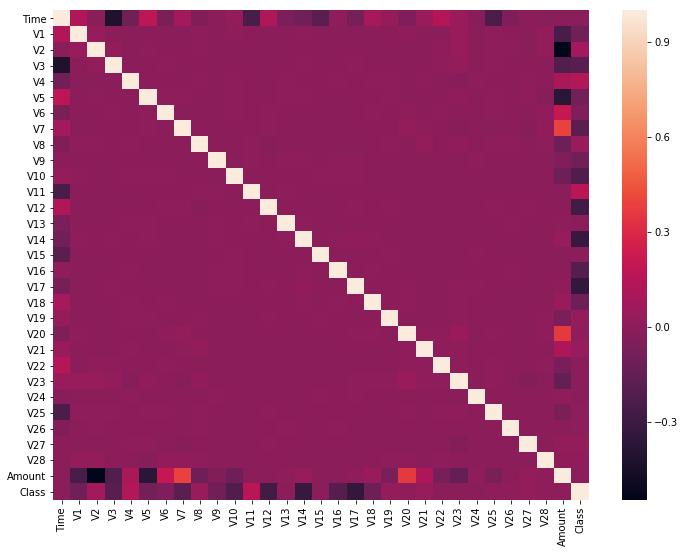

In [51]:
fig=plt.figure(figsize=(12,9))
sns.heatmap(corr_mat)
plt.show()

In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [53]:
#defining a random state
state=1

In [54]:
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=fraud_frac,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
        contamination=fraud_frac, novelty=True)}

In [55]:
n_outliers=len(fraud1)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name=='LocalOutlierFactor':
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf_name=='Isolation Forest'
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors=(y_pred!=y).sum()
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

D:\ANACONDA_INSTALLER\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\ANACONDA_INSTALLER\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 203
0.9976241192855972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.35      0.35      0.35       155

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.67      0.67      0.67     85442
weighted avg       1.00      1.00      1.00     85442

Local Outlier Factor: 276
0.996769738536083
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.02      0.01      0.01       155

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442



It can be observed that accuracy score is very high for both algorithms but in case of precision and recall isolation forest has a better score in detectng fradualant transactions.